In [59]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [94]:
dataset = "train"
root_dir = f"grid_dir/{dataset}/lc_classes"
files = os.listdir(root_dir)

In [95]:
len(files)

12324

In [96]:
total_counts = np.zeros(14)

for idx in tqdm(range(len(files))):

    with np.load(os.path.join(root_dir, files[idx])) as f:
        lc = f["arr_0"]
        lc = np.argmax(lc, axis=2)
    counts = np.bincount(lc.flatten())
    total_counts[:counts.shape[0]] += counts

100%|████████████████████████████████████████████████████████████████████████████| 12324/12324 [02:30<00:00, 82.02it/s]


In [97]:
total_counts

array([1.42010000e+04, 2.13212340e+07, 3.98827691e+08, 0.00000000e+00,
       7.72934100e+07, 5.27254970e+07, 1.96506652e+08, 1.77014530e+07,
       0.00000000e+00, 2.03250360e+07, 1.69424920e+07, 2.56153400e+06,
       0.00000000e+00, 3.44646400e+06])

In [98]:
total_pixels = np.sum(total_counts)

In [99]:
weights = total_counts / total_pixels

In [100]:
labels = ["Clouds", "Artificial surfaces and constructions", "Cultivated areas", "Vineyards", "Broadleaf tree cover", "Coniferous tree cover", "Herbaceous vegetation", "Moors and Heathland", "Sclerophyllous vegetation", "Marshes", "Peatbogs", "Natural material surfaces", "Permanent snow covered surfaces", "Water bodies"]

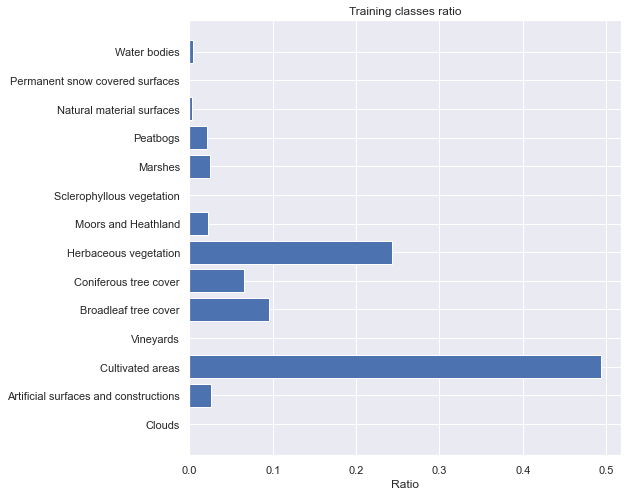

In [103]:
plt.figure(figsize=(10,8))
plt.barh( np.arange(14),weights)
dataset_name = "Validation" if dataset == "val" else "Training"
plt.title(f"{dataset_name} classes ratio")
plt.yticks(np.arange(14), labels, ha="right")
plt.gcf().subplots_adjust(left=0.3)
plt.xlabel("Ratio")
plt.savefig(f"{dataset}_classesratio.pdf")


In [56]:
weights

array([1.75827705e-05, 2.63985891e-02, 4.93802954e-01, 0.00000000e+00,
       9.56997597e-02, 6.52813402e-02, 2.43301976e-01, 2.19168076e-02,
       0.00000000e+00, 2.51651604e-02, 2.09771106e-02, 3.17152767e-03,
       0.00000000e+00, 4.26719143e-03])